# POC in a word perspective

## Main Algorithm:

1. Lemmatization

2. Protect stop words


3. // words (key phrases)   
Do:   
	Look for similar words (DBSCAN)   
Replace with centroid / one of the members   
Until Embedding distance is too high or utilization is too low.   


4. // sentences   
While K-anonymity is not reached:   
Find most similar sentences (Jaccard distance)   
Force them to be similar   

5. Do some utilization test / give some stats…


In [1]:
# For VSCODE
%reload_ext autoreload
%autoreload 2

## 0) Upload data

Import libraries

In [2]:
import pandas as pd

Import project files

In [3]:
#import sys
#sys.path.append("utils")
# from utils import models

In [4]:
from utils import nlp_utils, cluster_utils, utilization_utils, anonym_utils

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Uploading data

In [5]:
train_file = 'data/df_filtered.csv'

Getting dataframe

In [6]:
%%time
# Getting the df
#df = reading_bz_file(train_file)
df = pd.read_csv(train_file)

CPU times: total: 15.6 ms
Wall time: 14.6 ms


## 1+2) Lemmatizing and protecting stopwords

Defining the word dictionary

In [7]:
%%time
word_dict = nlp_utils.create_word_dict(df['txt'])
word_list = cluster_utils.get_word_list_for_clustering(word_dict)

CPU times: total: 21.5 s
Wall time: 23.5 s


## 3) Word replacement

### 3.1) Clustering using DBSCAN

Clustering

eps 1.8145278898835595
CPU times: total: 30.6 s
Wall time: 30.9 s


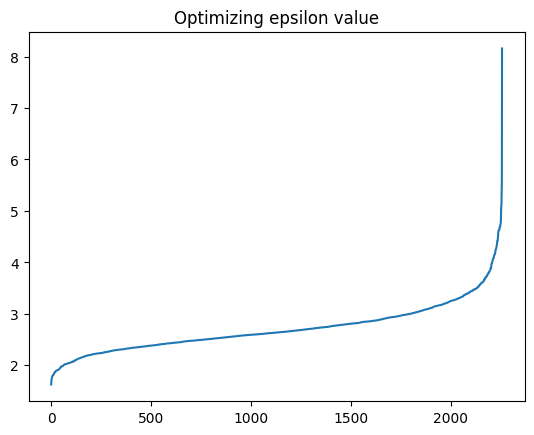

In [8]:
%%time
embedded_dict = cluster_utils.embed_corpus(word_list)
cluster_dict, dist_dict, dbscan = cluster_utils.run_clustering(embedded_dict)

Testing DBSCAN with cosine metric

eps 0.056689203


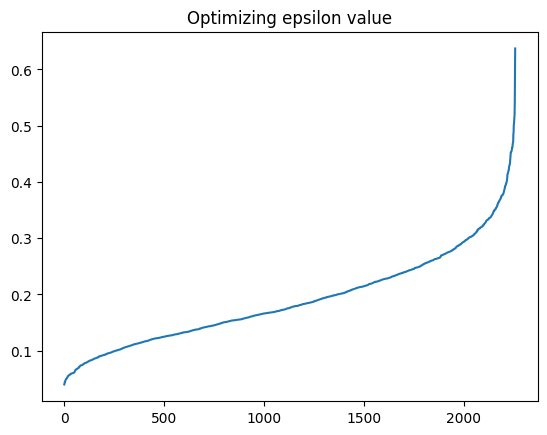

In [9]:
cluster_dict_cos, dist_dict_cos, dbscan_cos = cluster_utils.run_clustering(embedded_dict, cosine=True)

In [10]:
print('Euclidian distance:\t', len(cluster_dict), 'clusters')
print('Cosine distance:\t', len(cluster_dict_cos), 'clusters')

Euclidian distance:	 107 clusters
Cosine distance:	 60 clusters


Plotting tSNE

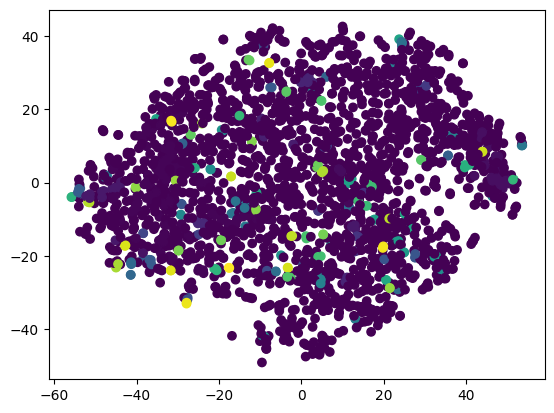

CPU times: total: 1min 10s
Wall time: 23.8 s


In [11]:
%%time
cluster_utils.plot_tsne(embedded_dict, dbscan)

Plotting Jaccard index histogram

In [12]:
test_dict = nlp_utils.create_word_dict(['hi, how are you?', 'I love chocolate', 'I love banana', 'he loves cola'])
test_list = cluster_utils.get_word_list_for_clustering(test_dict)
test_list

['love', 'chocolate', 'cola', 'hi', 'banana']

Getting distance threshold

In [13]:
threshold = cluster_utils.define_max_threshold()
threshold

0.1765408217906952

### 3.2) replacing words in documents

#### 3.2.1) Based on Eucledian distance

Starting average Jaccard index: 0.22369185766816038
the next cluster is too wide and wont be replaced: ['however', 'need', 'yet', 'already', 'since', 'enough', 'time', 'ever', 'get', 'everything', 'hear', 'yeah', 'tell', 'sure', 'two', 'forget', 'know', 'hit', 'might', 'five', 'leave', 'many', 'necessary', 'would', 'obviously', 'go', 'understand', 'surprised', 'whether', 'step', 'fly', 'blow', 'nothing', 'every', 'normally', 'maybe', 'fill', 'impressed', 'talk', 'unfortunately', 'either', 'whole', 'totally', 'anybody', 'hopefully', 'perhaps', 'three', 'wow', 'dumb', 'wrong', 'could', 'year', 'away', 'let', 'carry', 'third', 'life', 'take', 'think', 'straight', 'another', 'expect', 'collect', 'like', 'less', 'four', 'run', 'first', 'though', 'turn', 'make', 'easy', 'certainly', 'almost', 'yes', 'side', 'least', 'otherwise', 'give', 'last', 'apparently', 'right', 'soon', 'find', 'wonder', 'mind', 'reason', 'unless', 'possibly', 'lot', 'close', 'throw', 'barely', 'basically', 'jump', 'fac

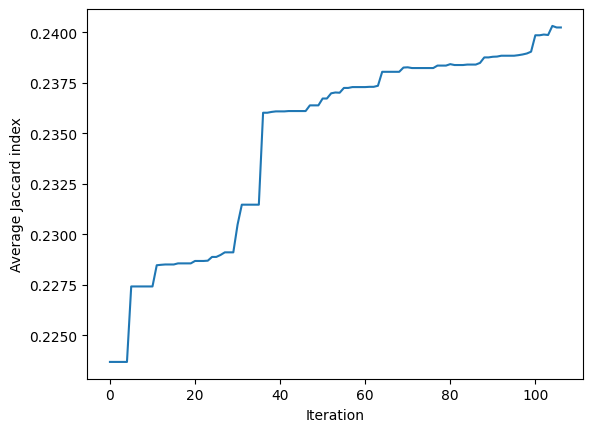

In [14]:
%%time
df_2, word_dict_2 = nlp_utils.replace_words_in_df(df, cluster_dict, dist_dict, threshold, word_dict)

In [15]:
df_2

,Unnamed: 0,txt,sentiment,num_of_words,anon_txt,anon_txt_history
0,84,voices from the farm: i have a copy of this bo...,1,27,voice from the farm : i have a copy of this bo...,{voice} (from) (the) farm: (i) (have) (a) copy...
1,99,"caution!: these tracks are not the ""original"" ...",0,22,"caution ! : these track are not the "" original...","caution!: (these) {track} (are) (not) (the) ""o..."
2,100,textbook: book shipped quickly and was in exce...,1,16,textbook : book ship quickly and was in excell...,textbook: book {ship} quickly (and) (was) (in)...
3,243,it was great!!!: i like it. it was very cool t...,1,21,it was great ! ! ! : i like it . it was very c...,(it) (was) great!!!: (i) like (it.) (it) (was)...
4,269,dockers do the job.: this product was just wha...,1,25,docker do the job . : this tools was just what...,{docker} (do) (the) job.: (this) [tools] (was)...
...,...,...,...,...,...,...
1002,41002,steer clear: steer clear of this blu-ray title...,0,27,steer clear : steer clear of this blu - ray ti...,steer clear: steer clear (of) (this) [borderla...
1003,41045,i like movies: as someone who likes all kinds ...,1,24,i like movie : as someone who like all kind of...,(i) like {movie} (as) someone (who) {like} (al...
1004,41149,sick and twisted is good...: this book is sick...,1,25,sick and twisted is fun ... : this book is sic...,sick (and) {twist} (is) [fun] (this) book (is)...
1005,41156,difficult for a lay person: i found this book ...,0,24,difficult for a lay person : i find this book ...,difficult (for) (a) lay person: (i) {find} (th...


#### 3.2.2) Based on Cosine distance

Starting average Jaccard index: 0.22369185766816038
the next cluster is too wide and wont be replaced: ['however', 'need', 'yet', 'already', 'since', 'enough', 'guy', 'ever', 'get', 'must', 'everything', 'hear', 'yeah', 'tell', 'sure', 'two', 'forget', 'boy', 'good', 'different', 'know', 'sometimes', 'might', 'five', 'leave', 'many', 'would', 'obviously', 'go', 'understand', 'long', 'surprised', 'speak', 'whether', 'nice', 'step', 'crazy', 'nothing', 'every', 'maybe', 'night', 'talk', 'unfortunately', 'either', 'whole', 'totally', 'anybody', 'old', 'hopefully', 'perhaps', 'three', 'dumb', 'wrong', 'could', 'say', 'year', 'work', 'let', 'kid', 'life', 'take', 'think', 'another', 'expect', 'dude', 'like', 'four', 'first', 'though', 'turn', 'make', 'easy', 'certainly', 'almost', 'yes', 'never', 'least', 'otherwise', 'give', 'last', 'apparently', 'right', 'soon', 'find', 'wonder', 'mind', 'reason', 'unless', 'possibly', 'explain', 'lot', 'summer', 'basically', 'true', 'finally', 'listen', 

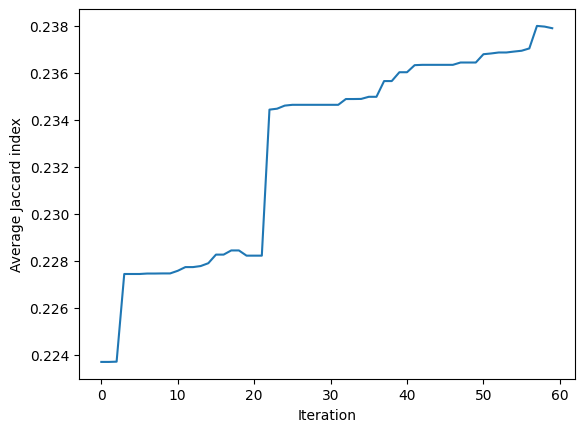

In [16]:
%%time
df_3, word_dict_3 = nlp_utils.replace_words_in_df(df, cluster_dict_cos, dist_dict_cos, threshold, word_dict)

In [17]:
df_3

,Unnamed: 0,txt,sentiment,num_of_words,anon_txt,anon_txt_history
0,84,voices from the farm: i have a copy of this bo...,1,27,voice from the farm : i have a copy of this bo...,{voice} (from) (the) farm: (i) (have) (a) copy...
1,99,"caution!: these tracks are not the ""original"" ...",0,22,"caution ! : these track are not the "" original...","caution!: (these) {track} (are) (not) (the) ""o..."
2,100,textbook: book shipped quickly and was in exce...,1,16,textbook : book ship quickly and was in excell...,textbook: book {ship} quickly (and) (was) (in)...
3,243,it was great!!!: i like it. it was very cool t...,1,21,it was exciting ! ! ! : i like it . it was ver...,(it) (was) [exciting] (i) like (it.) (it) (was...
4,269,dockers do the job.: this product was just wha...,1,25,docker do the job . : this product was just wh...,{docker} (do) (the) job.: (this) [tools] (was)...
...,...,...,...,...,...,...
1002,41002,steer clear: steer clear of this blu-ray title...,0,27,steer clear : steer clear of this blu - ray ti...,steer clear: steer clear (of) (this) [borderla...
1003,41045,i like movies: as someone who likes all kinds ...,1,24,i like movie : as someone who like all kind of...,(i) like {movie} (as) someone (who) {like} (al...
1004,41149,sick and twisted is good...: this book is sick...,1,25,sick and twisted is good ... : this book is si...,sick (and) {twist} (is) [fun] (this) book (is)...
1005,41156,difficult for a lay person: i found this book ...,0,24,difficult for a lay person : i find this book ...,difficult (for) (a) lay person: (i) {find} (th...


Looking at the histogram again

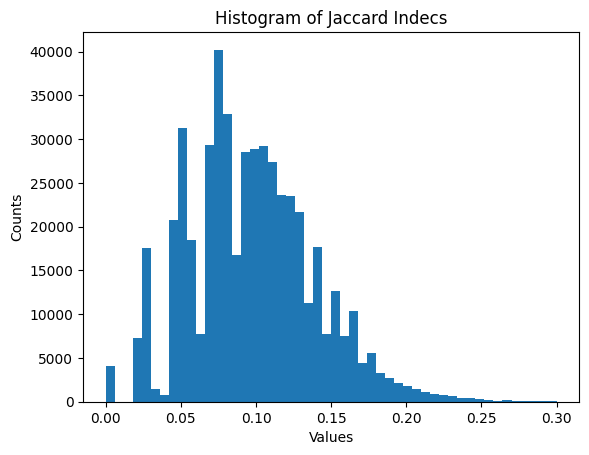

CPU times: total: 8.16 s
Wall time: 8.37 s


In [18]:
%%time
nlp_utils.plot_jaccard_hist(df_2, column='txt')

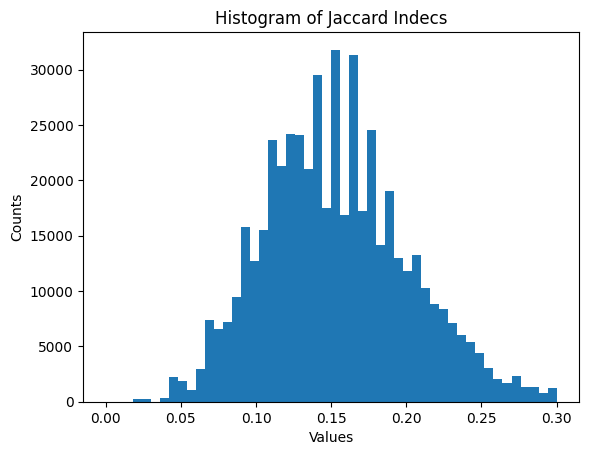

CPU times: total: 9.11 s
Wall time: 9.33 s


In [19]:
%%time
nlp_utils.plot_jaccard_hist(df_2, 'anon_txt')

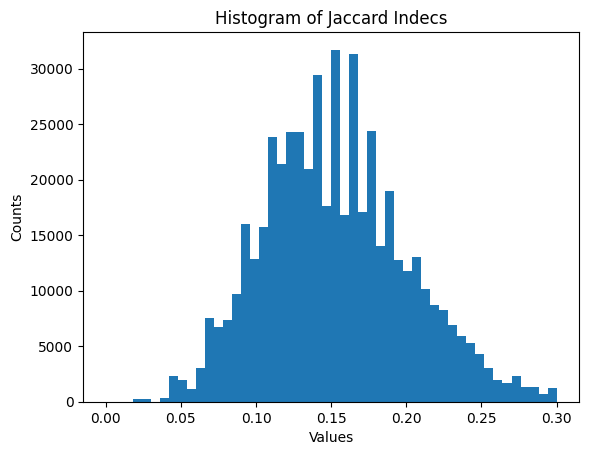

CPU times: total: 9.12 s
Wall time: 9.36 s


In [20]:
%%time
nlp_utils.plot_jaccard_hist(df_3, 'anon_txt')

In [21]:
print('Eucolidian dist:\t', df_2.iloc[3, 4])
print('Cosine dist:\t\t', df_3.iloc[3, 4])

Eucolidian dist:	 it was great ! ! ! : i like it . it was very cool to answer about vampire and other legendary crature of the fun .
Cosine dist:		 it was exciting ! ! ! : i like it . it was very cool to answer about vampire and other legendary crature of the night .


In [22]:
print('Eucolidian dist:\t', df_2.iloc[3, 5])
print('Cosine dist:\t\t', df_3.iloc[3, 5])

Eucolidian dist:	 (it) (was) great!!!: (i) like (it.) (it) (was) (very) cool (to) [answer] (about) {vampire} (and) (other) legendary {crature} (of) (the) [fun] 
Cosine dist:		 (it) (was) [exciting] (i) like (it.) (it) (was) (very) cool (to) [answer] (about) {vampire} (and) (other) legendary {crature} (of) (the) [fun] 


## 4) Force anonymity

In [28]:
anonym_utils.get_anonym_degree(['i love banana', 'he loves chocolate', 'she loves chocolate'])

(1, [[0]])

In [30]:
anonym_utils.get_anonym_degree(['i love banana', 'he loves chocolate', 'she loves chocolate'], min_k=3)

(3, [[1, 2], [0]])

In [32]:
k = 3

Before replacement

In [43]:
curr_k, non_anon_indexes = anonym_utils.get_anonym_degree(docs=df_2['txt'])
print('Current k:', curr_k, '\tnumber of documents:', len(non_anon_indexes))

Current k: 1 	number of documents: 1005


After replacement

In [41]:
curr_k, non_anon_indexes = anonym_utils.get_anonym_degree(docs=df_2['anon_txt'])
print('Current k:', curr_k, '\tnumber of documents:', len(non_anon_indexes))

Current k: 1 	number of documents: 1005


In [44]:
vecs, _ = anonym_utils.get_bow(df_2['anon_txt'])

In [46]:
curr_k, non_anon_indexes = anonym_utils.get_anonym_degree(vecs=vecs)
print('Current k:', curr_k, '\tnumber of documents:', len(non_anon_indexes))

Current k: 1 	number of documents: 1005


## 5) Utilization tests

In [23]:
df_21 = utilization_utils.get_vader_sentiment_for_df(df_2, ['txt', 'anon_txt'])
df_21

,Unnamed: 0,txt,sentiment,num_of_words,anon_txt,anon_txt_history,txt_vader_sentiment_pred,anon_txt_vader_sentiment_pred
0,84,voices from the farm: i have a copy of this bo...,1,27,voice from the farm : i have a copy of this bo...,{voice} (from) (the) farm: (i) (have) (a) copy...,0.6369,0.6369
1,99,"caution!: these tracks are not the ""original"" ...",0,22,"caution ! : these track are not the "" original...","caution!: (these) {track} (are) (not) (the) ""o...",0.0000,-0.1957
2,100,textbook: book shipped quickly and was in exce...,1,16,textbook : book ship quickly and was in excell...,textbook: book {ship} quickly (and) (was) (in)...,0.7650,0.8720
3,243,it was great!!!: i like it. it was very cool t...,1,21,it was great ! ! ! : i like it . it was very c...,(it) (was) great!!!: (i) like (it.) (it) (was)...,0.7157,0.9242
4,269,dockers do the job.: this product was just wha...,1,25,docker do the job . : this tools was just what...,{docker} (do) (the) job.: (this) [tools] (was)...,0.1761,0.2006
...,...,...,...,...,...,...,...,...
1002,41002,steer clear: steer clear of this blu-ray title...,0,27,steer clear : steer clear of this blu - ray ti...,steer clear: steer clear (of) (this) [borderla...,0.1045,0.1045
1003,41045,i like movies: as someone who likes all kinds ...,1,24,i like movie : as someone who like all kind of...,(i) like {movie} (as) someone (who) {like} (al...,0.8625,0.8658
1004,41149,sick and twisted is good...: this book is sick...,1,25,sick and twisted is fun ... : this book is sic...,sick (and) {twist} (is) [fun] (this) book (is)...,-0.4404,0.1027
1005,41156,difficult for a lay person: i found this book ...,0,24,difficult for a lay person : i find this book ...,difficult (for) (a) lay person: (i) {find} (th...,0.5647,0.4084


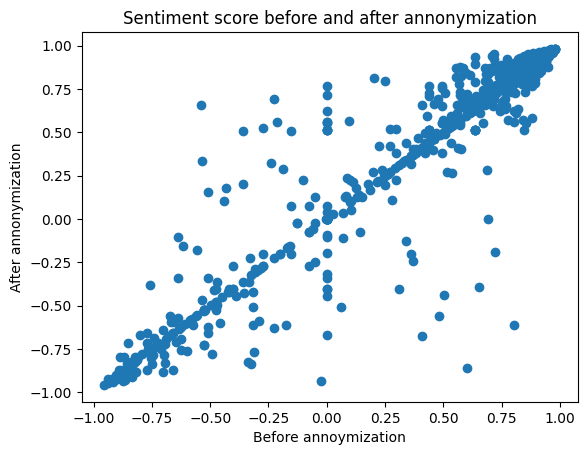

In [24]:
import matplotlib.pyplot as plt

plt.scatter(df_21['txt_vader_sentiment_pred'], df_21['anon_txt_vader_sentiment_pred'])
plt.xlabel('Before annoymization')
plt.ylabel('After annonymization')
plt.title('Sentiment score before and after annonymization');


In [25]:
utilization_utils.sentiment_test(df_2, 'txt')

0.7771153846153847

In [26]:
utilization_utils.sentiment_test(df_2, 'anon_txt')

0.806923076923077